In [247]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import json

In [248]:
"""
@author Trong Nghia

"""
def load_config(path_file_config):
    with open(path_file_config) as file_object:
        config_data = json.load(file_object)
        return config_data
    

In [249]:
"""
@author Trong Nghia

"""
def load_label(path_foder_data, path_foder_label_json):
    data_path = os.path.join(path_foder_data,'*jpg')
    files = glob.glob(data_path)
    with open(path_foder_label_json) as file_object:
        label_all = json.load(file_object)
        return label_all

In [250]:
"""
@author Trong Nghia

"""
def load_data(path_dir_data, path_dir_data_label , image_widght, image_height, chanel):
    label_all = load_label(path_dir_data, path_dir_data_label)
    data_path = os.path.join(path_dir_data,'*jpg')
    files = glob.glob(data_path)
    number_items = len(files)
    data1 = []
    data = np.zeros((number_items,image_widght,image_height, chanel))
    data_label = np.zeros((1,number_items))
    for i in range(number_items):
        img = cv2.imread(files[i])
        data2 = files[i].split('\\')
        name_image = data2[len(data2)-1]
        data_label[0][i] = label_all["data"][name_image]["label"]
        data1.append(img)
    images = np.asarray(data1)
    for i in range(images.shape[0]):
        data[i]= images[i]/255#khi gan bien sang kieu mang numpy, cac phan tu se tu dong chuyen sang kieu float ma cac pixel anh o kieu float chi tu 0->1 nen phai chia cho 255 de dam bao cac pixel anh kieu float nam trong [0,1]
    return data, data_label

In [251]:
"""
@author Trong Nghia

"""
def standardized_image_test(path_dir_data, image_widght, image_height, chanel):
    data_path = os.path.join(path_dir_data,'*jpg')
    files = glob.glob(data_path)
    number_items = len(files)
    data1 = []
    data = np.zeros((number_items,image_widght,image_height, chanel))
    for i in range(number_items):
        img = cv2.imread(files[i])
        data2 = files[i].split('\\')
        data1.append(img)
    images = np.asarray(data1)
    for i in range(images.shape[0]):
        data[i]= images[i]/255#khi gan bien kieu numpy cac phan tu se tu dong chuyen sang kieu float ma cac pixel anh o kieu float chi tu 0->1 nen phai chia cho 255 de dam bao cac pixel anh kieu float nam trong [0,1]
    return data

In [252]:
"""
@author Trong Nghia

Argument:
- quantity_w: số lượng trọng số = image_widght*image_height*chanel
- b : bias

returns:
- vector w shape(quantity_w,0)
- integer b
"""
def init_param(quantity_w,b=0, style ="zeros"):
    
    if(style=="random"):
        w = np.random.randn(quantity_w,1) * 0.01
    else:
        w = np.zeros(shape=(quantity_w,1))
    return w,b

In [253]:
"""
@author Trong Nghia

Hàm sigmoid
Arguments:
- z 

returns:
- sigmoid z
"""

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [254]:
"""
@author Trong Nghia

Arguments:
- w shape                   shape(quantity_w,1)
- b integer 
- X dữ liệu train           shape(quantity_w,m)
- Y nhãn dữ liệu train      shape(1,m)

returns:
- A giá trị mô hình dự đoán shape(1,m)
- cost: giá trị cost

"""

def foward_propagation(w,b,X,Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
    return A,cost

In [255]:
"""
@author Trong Nghia

Arguments:
- X:dữ liệu train            shape(quantity_w,m)
- Y: nhãn dữ liệu train      shape(1,m)
- A: giá trị mô hình dự đoán shape(1,m)

"""

def back_propagation(A,X,Y):
    m = X.shape[1]
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    return dw,db

In [256]:
"""
@author Trong Nghia

Hàm train

Arguments:
- w shape                    shape(quantity_w,1)
- b integer 
- X dữ liệu train            shape(quantity_w,m)
- Y: nhãn dữ liệu train      shape(1,m)
- epoch: số vòng lặp
- learning_rate: tốc độ học

returns:
- arr_epoch: mảng chứa số vòng lặp, mỗi phần tử mảng là một số nguyên(số thứ tự của vòng lặp) => để vẽ biểu đồ cost
- cost: giá trị cost
- w: giá trị bộ trọng số sau khi train shape(quantity_w,1)

"""

def fit(w, b, X, Y, epoch, learning_rate):
    costs = []
    arr_epoch = np.arange(1,epoch+1)
    for i in range(epoch):
        A, cost = foward_propagation(w, b, X, Y)
        dw, db = back_propagation(A, X, Y)
        w = w - learning_rate * dw
        b = b - learning_rate * db
        costs.append(cost)
        print("cost " + str(cost))
    return costs, arr_epoch, w

In [257]:
"""
@author Trong Nghia

Hàm dự đoán

Arguments:
- w shape                    shape(quantity_w,1)
- b integer 
- X dữ liệu test             shape(quantity_w,m_test)

returns:
- label_predict: nhãn dự đoán của tập dữ liệu test shape(1,m_test)
- num_label_1: số lượng ảnh dự đoán là nhãn 1
- num_label_0: số lượng ảnh dự đoán là nhãn 0
"""

def predict(w, b, X):
    A = sigmoid(np.dot(w.T, X) + b)
    label_predict = np.zeros((1,A.shape[1]))
    num_label_1 = 0
    num_label_0 = 0
    for i in range(A.shape[1]):
        if(A[0][i] > 0.5):
            label_predict[0][i] = 1
            num_label_1 +=1
        elif(A[0][i] == 0.5):
            label_predict[0][i] = 0.5
        else:
            label_predict[0][i] = 0
            num_label_0 += 1
    return label_predict, num_label_1, num_label_0

In [268]:
"""
@author Trong Nghia

"""
#load file cấu hình
PATH_FILE_CONFIG = "C:\\Users\\Trong Nghia\\AppData\\Local\\Programs\\Python\\Python36\\Scripts\\Jupyter file code\\config.json"
CONFIG = load_config(PATH_FILE_CONFIG)
IMAGE_WIDGHT = CONFIG["config"]["IMAGE_WIDGHT"]
IMAGE_HEIGHT = CONFIG["config"]["IMAGE_HEIGHT"]
CHANEL = CONFIG["config"]["CHANEL"]
EPOCH = CONFIG["config"]["EPOCH"]
LEARNING_RATE = CONFIG["config"]["LEARNING_RATE"]
PATH_FODER_DATA = CONFIG["config"]["PATH_FODER_DATA"]
PATH_FILE_LABEL = CONFIG["config"]["PATH_FILE_LABEL"]
PATH_FODER_IMAGE_TEST = CONFIG["config"]["PATH_FODER_IMAGE_TEST"]

In [259]:
"""
@author Trong Nghia

"""
data_train, data_label = load_data(PATH_FODER_DATA, PATH_FILE_LABEL, IMAGE_WIDGHT, IMAGE_HEIGHT, CHANEL)
X = data_train.reshape(data_train.shape[0], -1).T #shape (a,b,c,d) => shape (b*c*d,a)

In [260]:
"""
@author Trong Nghia

"""
w, b = init_param(X.shape[0],style = "random")

In [261]:
"""
@author Trong Nghia

"""
costs, arr_epoch, w_model = fit(w, b, X, data_label, EPOCH, LEARNING_RATE)

cost 0.925193033060031
cost 1.5004187352608007
cost 1.823820931392846
cost 1.664107454172172
cost 1.762662463007883
cost 1.69303215752027
cost 1.744187582256018
cost 1.6970236534705248
cost 1.7367320845772696
cost 1.6948814906874468
cost 1.7320828952777323
cost 1.69117485522121
cost 1.7281179247439784
cost 1.6870644490784712
cost 1.7242937509227416
cost 1.6828480027113037
cost 1.7204737465384583
cost 1.678602121784017
cost 1.7166256871657481
cost 1.6743466509146094
cost 1.712743934285319
cost 1.670086893500986
cost 1.7088294623985811
cost 1.665824450701576
cost 1.704884757874767
cost 1.6615599994293595
cost 1.7009125318165446
cost 1.657294003233772
cost 1.6969154072111319
cost 1.653026894019591
cost 1.692895853210305
cost 1.648759118144743
cost 1.6888561810898512
cost 1.6444911473235957
cost 1.6847985548530107
cost 1.6402234799605373
cost 1.6807250046436983
cost 1.6359566395271923
cost 1.6766374400321142
cost 1.6316911717794245
cost 1.6725376624638288
cost 1.6274276413862094
cost 1.668

cost 1.158497205201963
cost 1.1888531450795774
cost 1.1566353217593726
cost 1.1867465285935408
cost 1.1547822959216005
cost 1.1846490612751432
cost 1.1529380318583895
cost 1.1825606764744017
cost 1.1511024352009471
cost 1.1804813079605452
cost 1.1492754130163583
cost 1.1784108899226435
cost 1.1474568737824025
cost 1.176349356970086
cost 1.1456467273627848
cost 1.174296644132922
cost 1.1438448849827667
cost 1.172252686862066
cost 1.1420512592052032
cost 1.1702174210293848
cost 1.1402657639069804
cost 1.1681907829276543
cost 1.1384883142558444
cost 1.1661727092704086
cost 1.1367188266876236
cost 1.16416313719168
cost 1.1349572188838328
cost 1.1621620042456307
cost 1.1332034097496557
cost 1.1601692484060921
cost 1.131457319392302
cost 1.1581848080660095
cost 1.1297188690997244
cost 1.1562086220367938
cost 1.1279879813196985
cost 1.1542406295475958
cost 1.1262645796392554
cost 1.1522807702444955
cost 1.124548588764457
cost 1.150328984189621
cost 1.1228399345005111
cost 1.1483852118601923
c

cost 0.9191472128755022
cost 0.9189425820749811
cost 0.9179465799669965
cost 0.9178632814591766
cost 0.9167488365522241
cost 0.9167862365465212
cost 0.9155539688635649
cost 0.9157114346781129
cost 0.9143619632753377
cost 0.9146388633255325
cost 0.9131728063015007
cost 0.9135685100893417
cost 0.9119864845933654
cost 0.9125003626975877
cost 0.9108029849373299
cost 0.9114344090043116
cost 0.9096222942526297
cost 0.9103706369880699
cost 0.9084443995891079
cost 0.9093090347504577
cost 0.9072692881250053
cost 0.9082495905146456
cost 0.9060969471647681
cost 0.9071922926239184
cost 0.9049273641368795
cost 0.9061371295402268
cost 0.9037605265917109
cost 0.9050840898427462
cost 0.9025964221993942
cost 0.9040331622264411
cost 0.9014350387477177
cost 0.9029843355006425
cost 0.9002763641400441
cost 0.9019375985876306
cost 0.8991203863932529
cost 0.9008929405212294
cost 0.897967093635703
cost 0.8998503504454065
cost 0.8968164741052236
cost 0.8988098176128878
cost 0.8956685161471272
cost 0.8977713313

cost 0.7466944730111339
cost 0.759073648658257
cost 0.7458527536083943
cost 0.7582641039747409
cost 0.7450125133828804
cost 0.7574556685420457
cost 0.7441737467696642
cost 0.7566483386095452
cost 0.7433364482231688
cost 0.7558421104419398
cost 0.7425006122171127
cost 0.7550369803191188
cost 0.7416662332444505
cost 0.7542329445360251
cost 0.7408333058173153
cost 0.7534299994025202
cost 0.7400018244669584
cost 0.7526281412432506
cost 0.7391717837436911
cost 0.7518273663975187
cost 0.7383431782168262
cost 0.7510276712191504
cost 0.7375160024746159
cost 0.7502290520763686
cost 0.7366902511241956
cost 0.7494315053516658
cost 0.7358659187915197
cost 0.7486350274416793
cost 0.7350430001213045
cost 0.7478396147570678
cost 0.7342214897769658
cost 0.7470452637223876
cost 0.7334013824405579
cost 0.7462519707759733
cost 0.7325826728127127
cost 0.7454597323698184
cost 0.7317653556125779
cost 0.7446685449694552
cost 0.730949425577755
cost 0.7438784050538404
cost 0.7301348774642373
cost 0.74308930911

cost 0.6334370761638174
cost 0.6189853253163986
cost 0.6327725226831777
cost 0.6183308383776022
cost 0.6321085847083596
cost 0.6176771025463236
cost 0.6314452600023246
cost 0.6170241147013708
cost 0.6307825463339822
cost 0.6163718717315725
cost 0.6301204414781848
cost 0.6157203705357527
cost 0.6294589432157245
cost 0.6150696080227056
cost 0.6287980493333273
cost 0.6144195811111717
cost 0.6281377576236505
cost 0.6137702867298117
cost 0.6274780658852783
cost 0.6131217218171845
cost 0.6268189719227178
cost 0.6124738833217218
cost 0.6261604735463965
cost 0.6118267682017055
cost 0.6255025685726586
cost 0.6111803734252443
cost 0.6248452548237623
cost 0.6105346959702517
cost 0.6241885301278768
cost 0.6098897328244219
cost 0.6235323923190793
cost 0.6092454809852093
cost 0.6228768392373539
cost 0.608601937459805
cost 0.6222218687285876
cost 0.6079590992651167
cost 0.6215674786445697
cost 0.6073169634277467
cost 0.6209136668429884
cost 0.6066755269839699
cost 0.6202604311874307
cost 0.6060347869

cost 0.5265294496969724
cost 0.5151894504689702
cost 0.525942796125222
cost 0.5146259948696984
cost 0.5253564604449498
cost 0.5140628876160149
cost 0.5247704414414183
cost 0.5135001271038092
cost 0.5241847379058362
cost 0.5129377117370438
cost 0.5235993486353551
cost 0.512375639927746
cost 0.5230142724330682
cost 0.5118139100960007
cost 0.5224295081080081
cost 0.5112525206699413
cost 0.5218450544751448
cost 0.5106914700857423
cost 0.5212609103553831
cost 0.5101307567876112
cost 0.5206770745755602
cost 0.509570379227779
cost 0.5200935459684444
cost 0.5090103358664938
cost 0.5195103233727316
cost 0.5084506251720109
cost 0.518927405633044
cost 0.5078912456205852
cost 0.5183447915999262
cost 0.5073321956964619
cost 0.5177624801298443
cost 0.5067734738918688
cost 0.517180470085182
cost 0.5062150787070074
cost 0.516598760334239
cost 0.5056570086500436
cost 0.5160173497512278
cost 0.5050992622370993
cost 0.5154362372162706
cost 0.5045418379922441
cost 0.5148554216153973
cost 0.503984734447484

cost 0.4238964607765797
cost 0.43058317867839146
cost 0.42337512191741844
cost 0.4300377592618415
cost 0.42285396540479797
cost 0.42949253272025245
cost 0.422332990803432
cost 0.42894749876271876
cost 0.4218121976832066
cost 0.42840265710286285
cost 0.4212915856191562
cost 0.4278580074588219
cost 0.42077115419143696
cost 0.4273135495532343
cost 0.42025090298530415
cost 0.42676928311322715
cost 0.4197308315910856
cost 0.42622520787040274
cost 0.4192109396041584
cost 0.4256813235608256
cost 0.4186912266249234
cost 0.42513762992501014
cost 0.41817169225878154
cost 0.4245941267079068
cost 0.41765233611610914
cost 0.4240508136588907
cost 0.4171331578122335
cost 0.423507690531748
cost 0.416614156967409
cost 0.4229647570846641
cost 0.4160953332067934
cost 0.42242201308021093
cost 0.41557668616042276
cost 0.42187945828533474
cost 0.41505821546318894
cost 0.42133709247134404
cost 0.41453992075481527
cost 0.42079491541389763
cost 0.4140218016798329
cost 0.42025292689299343
cost 0.413503857887558

cost 0.3415714744529474
cost 0.3381855632979094
cost 0.3410578184834558
cost 0.33769249132441337
cost 0.3405443735603865
cost 0.3371995958991063
cost 0.3400311404436249
cost 0.3367068775859998
cost 0.3395181199097467
cost 0.33621433696439085
cost 0.3390053127523924
cost 0.3357219746292201
cost 0.3384927197826537
cost 0.3352297911914395
cost 0.3379803418294675
cost 0.33473778727839004
cost 0.33746817974002236
cost 0.33424596353419017
cost 0.33695623438017364
cost 0.33375432062013294
cost 0.33644450663487097
cost 0.33326285921509585
cost 0.3359329974085959
cost 0.33277158001596
cost 0.33542170762581136
cost 0.33228048373804175
cost 0.33491063823142264
cost 0.33178957111553453
cost 0.33439979019125027
cost 0.3312988429019634
cost 0.3338891644925152
cost 0.330808299870651
cost 0.33337876214433687
cost 0.33031794281519694
cost 0.3328685841782433
cost 0.32982777254996815
cost 0.3323586316486953
cost 0.32933778991060414
cost 0.331848905633624
cost 0.32884799575453433
cost 0.33133940723498173


cost 0.2596822655521205
cost 0.25989257689885176
cost 0.2592728707653461
cost 0.2594744909337246
cost 0.25886503034877734
cost 0.2590580874772875
cost 0.2584587739016739
cost 0.25864339691916327
cost 0.258054131429079
cost 0.2582304500366038
cost 0.2576511333349171
cost 0.2578192779862578
cost 0.2572498104142499
cost 0.2574099122950618
cost 0.25685019384465774
cost 0.25700238485021865
cost 0.256452315176714
cost 0.25659672788823257
cost 0.25605620632351694
cost 0.25619297398296964
cost 0.2556618995492485
cost 0.2557911560327091
cost 0.25526942745672565
cost 0.2553913072461569
cost 0.25487882297391284
cost 0.25499346112739024
cost 0.25449011933936516
cost 0.25459765145970364
cost 0.2541033500865706
cost 0.2542039122883276
cost 0.2537185490271619
cost 0.25381227790199423
cost 0.2533357502329718
cost 0.25342278281332264
cost 0.252954988016902
cost 0.2530354617380014
cost 0.25257629691258393
cost 0.25265034957274457
cost 0.25219971165280525
cost 0.25226748137200267
cost 0.25182526714668213

cost 0.224342663177659
cost 0.22430154045882486
cost 0.22426045650316317
cost 0.22421940315746403
cost 0.22417838676934146
cost 0.22413740031907803
cost 0.22409644918369923
cost 0.22405552732362685
cost 0.22401463928345225
cost 0.223973779870242
cost 0.22393295291589635
cost 0.2238921539580647
cost 0.22385138621957332
cost 0.22381064586787372
cost 0.22376993560623393
cost 0.22372925214450268
cost 0.22368859774359504
cost 0.2236479695800436
cost 0.22360736953888494
cost 0.2235667951978286
cost 0.22352624812316904
cost 0.223485726237182
cost 0.22344523083644344
cost 0.22340476013892868
cost 0.223364315213483
cost 0.2233238945316462
cost 0.2232834989704281
cost 0.22324312721864262
cost 0.22320277999209232
cost 0.22316245616564184
cost 0.2231221563199712
cost 0.22308187948915884
cost 0.22304162614093187
cost 0.22300139544554007
cost 0.2229611877765614
cost 0.22292100242065038
cost 0.22288083967315095
cost 0.22284069892018174
cost 0.2228005803922928
cost 0.22276048356056052
cost 0.222720408

cost 0.21168053701633444
cost 0.21164517904538444
cost 0.21160983431646954
cost 0.21157450281641518
cost 0.21153918453207946
cost 0.21150387945035287
cost 0.2114685875581583
cost 0.211433308842451
cost 0.21139804329021816
cost 0.211362790888479
cost 0.21132755162428474
cost 0.21129232548471835
cost 0.21125711245689435
cost 0.21122191252795883
cost 0.21118672568508928
cost 0.21115155191549462
cost 0.2111163912064147
cost 0.21108124354512064
cost 0.2110461089189145
cost 0.21101098731512896
cost 0.21097587872112766
cost 0.2109407831243048
cost 0.210905700512085
cost 0.21087063087192318
cost 0.21083557419130483
cost 0.21080053045774524
cost 0.21076549965879002
cost 0.2107304817820146
cost 0.21069547681502418
cost 0.21066048474545376
cost 0.21062550556096793
cost 0.21059053924926083
cost 0.21055558579805583
cost 0.21052064519510574
cost 0.21048571742819244
cost 0.21045080248512696
cost 0.21041590035374932
cost 0.2103810110219282
cost 0.21034613447756126
cost 0.21031127070857472
cost 0.21027

cost 0.20057114320763814
cost 0.20053961822629884
cost 0.20050810336379576
cost 0.20047659861339517
cost 0.2004451039683741
cost 0.2004136194220204
cost 0.20038214496763287
cost 0.20035068059852082
cost 0.20031922630800425
cost 0.20028778208941403
cost 0.2002563479360916
cost 0.2002249238413889
cost 0.20019350979866854
cost 0.20016210580130384
cost 0.2001307118426783
cost 0.2000993279161862
cost 0.20006795401523222
cost 0.20003659013323136
cost 0.20000523626360917
cost 0.1999738923998015
cost 0.19994255853525456
cost 0.19991123466342478
cost 0.1998799207777791
cost 0.19984861687179448
cost 0.19981732293895824
cost 0.1997860389727679
cost 0.19975476496673106
cost 0.19972350091436555
cost 0.19969224680919925
cost 0.19966100264477019
cost 0.19962976841462632
cost 0.1995985441123258
cost 0.19956732973143665
cost 0.1995361252655369
cost 0.19950493070821454
cost 0.1994737460530674
cost 0.1994425712937034
cost 0.19941140642374
cost 0.1993802514368048
cost 0.19934910632653485
cost 0.1993179710

cost 0.19056771890906793
cost 0.19053925302767624
cost 0.19051079547179525
cost 0.19048234623709312
cost 0.1904539053192426
cost 0.19042547271392124
cost 0.19039704841681127
cost 0.19036863242359928
cost 0.1903402247299769
cost 0.19031182533164007
cost 0.1902834342242896
cost 0.19025505140363078
cost 0.1902266768653735
cost 0.19019831060523232
cost 0.19016995261892636
cost 0.1901416029021792
cost 0.19011326145071927
cost 0.19008492826027926
cost 0.19005660332659652
cost 0.190028286645413
cost 0.18999997821247505
cost 0.1899716780235337
cost 0.18994338607434436
cost 0.18991510236066694
cost 0.18988682687826594
cost 0.1898585596229102
cost 0.18983030059037326
cost 0.18980204977643278
cost 0.18977380717687123
cost 0.1897455727874753
cost 0.18971734660403616
cost 0.1896891286223495
cost 0.18966091883821526
cost 0.18963271724743785
cost 0.1896045238458262
cost 0.18957633862919346
cost 0.18954816159335722
cost 0.18951999273413958
cost 0.1894918320473667
cost 0.18946367952886933
cost 0.189435

cost 0.1815503672852034
cost 0.18152445163582057
cost 0.18149854308307456
cost 0.18147264162378182
cost 0.18144674725476156
cost 0.18142085997283522
cost 0.18139497977482705
cost 0.18136910665756384
cost 0.18134324061787468
cost 0.1813173816525915
cost 0.18129152975854848
cost 0.18126568493258255
cost 0.18123984717153307
cost 0.18121401647224186
cost 0.18118819283155344
cost 0.1811623762463146
cost 0.1811365667133748
cost 0.18111076422958597
cost 0.18108496879180253
cost 0.18105918039688132
cost 0.18103339904168192
cost 0.18100762472306609
cost 0.18098185743789827
cost 0.18095609718304523
cost 0.18093034395537644
cost 0.18090459775176365
cost 0.18087885856908112
cost 0.1808531264042057
cost 0.18082740125401653
cost 0.1808016831153952
cost 0.180775971985226
cost 0.1807502678603954
cost 0.18072457073779252
cost 0.18069888061430864
cost 0.1806731974868379
cost 0.18064752135227652
cost 0.18062185220752322
cost 0.18059619004947935
cost 0.18057053487504843
cost 0.1805448866811366
cost 0.1805

cost 0.17329449781015108
cost 0.17327078323253706
cost 0.17324707481264714
cost 0.17322337254797737
cost 0.17319967643602527
cost 0.17317598647429025
cost 0.1731523026602731
cost 0.17312862499147638
cost 0.1731049534654043
cost 0.1730812880795626
cost 0.17305762883145873
cost 0.17303397571860166
cost 0.17301032873850214
cost 0.17298668788867239
cost 0.17296305316662633
cost 0.17293942456987946
cost 0.17291580209594884
cost 0.17289218574235335
cost 0.1728685755066132
cost 0.17284497138625043
cost 0.17282137337878853
cost 0.17279778148175268
cost 0.17277419569266975
cost 0.1727506160090679
cost 0.17272704242847728
cost 0.17270347494842944
cost 0.17267991356645743
cost 0.17265635828009607
cost 0.1726328090868817
cost 0.17260926598435225
cost 0.17258572897004723
cost 0.17256219804150774
cost 0.17253867319627658
cost 0.17251515443189785
cost 0.17249164174591752
cost 0.172468135135883
cost 0.17244463459934334
cost 0.172421140133849
cost 0.1723976517369523
cost 0.1723741694062069
cost 0.17235

cost 0.16567984344568776
cost 0.16565806091327331
cost 0.16563628378113046
cost 0.16561451204721606
cost 0.16559274570948818
cost 0.16557098476590587
cost 0.16554922921442958
cost 0.16552747905302065
cost 0.16550573427964188
cost 0.16548399489225687
cost 0.1654622608888308
cost 0.1654405322673296
cost 0.1654188090257205
cost 0.165397091161972
cost 0.16537537867405352
cost 0.16535367155993588
cost 0.16533196981759085
cost 0.16531027344499144
cost 0.16528858244011171
cost 0.16526689680092702
cost 0.16524521652541377
cost 0.1652235416115495
cost 0.16520187205731293
cost 0.16518020786068388
cost 0.16515854901964333
cost 0.1651368955321734
cost 0.16511524739625733
cost 0.1650936046098795
cost 0.1650719671710254
cost 0.1650503350776818
cost 0.1650287083278364
cost 0.16500708691947813
cost 0.164985470850597
cost 0.1649638601191843
cost 0.16494225472323218
cost 0.1649206546607342
cost 0.16489905992968487
cost 0.16487747052807986
cost 0.16485588645391602
cost 0.1648343077051913
cost 0.164812734

cost 0.15869277544197574
cost 0.15867268962136144
cost 0.15865260857726035
cost 0.15863253230796584
cost 0.15861246081177213
cost 0.15859239408697445
cost 0.15857233213186875
cost 0.1585522749447519
cost 0.15853222252392163
cost 0.15851217486767663
cost 0.15849213197431633
cost 0.15847209384214117
cost 0.15845206046945234
cost 0.15843203185455196
cost 0.158412007995743
cost 0.15839198889132935
cost 0.15837197453961563
cost 0.15835196493890755
cost 0.15833196008751146
cost 0.15831195998373473
cost 0.15829196462588552
cost 0.1582719740122729
cost 0.15825198814120675
cost 0.15823200701099785
cost 0.15821203061995784
cost 0.15819205896639926
cost 0.15817209204863542
cost 0.1581521298649806
cost 0.15813217241374977
cost 0.15811221969325898
cost 0.158092271701825
cost 0.15807232843776547
cost 0.15805238989939888
cost 0.1580324560850447
cost 0.1580125269930231
cost 0.15799260262165518
cost 0.15797268296926284
cost 0.15795276803416894
cost 0.15793285781469704
cost 0.1579129523091717
cost 0.157

cost 0.15222107961850073
cost 0.1522025035714341
cost 0.1521839317743666
cost 0.15216536422585178
cost 0.15214680092444388
cost 0.15212824186869783
cost 0.15210968705716932
cost 0.15209113648841463
cost 0.15207259016099073
cost 0.15205404807345538
cost 0.1520355102243669
cost 0.1520169766122844
cost 0.15199844723576755
cost 0.15197992209337682
cost 0.15196140118367335
cost 0.15194288450521887
cost 0.15192437205657588
cost 0.1519058638363076
cost 0.1518873598429778
cost 0.15186886007515105
cost 0.15185036453139247
cost 0.1518318732102681
cost 0.15181338611034434
cost 0.15179490323018854
cost 0.1517764245683685
cost 0.15175795012345294
cost 0.1517394798940112
cost 0.15172101387861303
cost 0.15170255207582917
cost 0.151684094484231
cost 0.15166564110239042
cost 0.15164719192888013
cost 0.1516287469622734
cost 0.15161030620114438
cost 0.1515918696440676
cost 0.1515734372896185
cost 0.15155500913637315
cost 0.1515365851829082
cost 0.15151816542780103
cost 0.1514997498696297
cost 0.151481338

cost 0.14627893785072926
cost 0.14626169727012564
cost 0.1462444604945204
cost 0.14622722752267237
cost 0.14620999835334134
cost 0.14619277298528724
cost 0.1461755514172709
cost 0.1461583336480535
cost 0.14614111967639679
cost 0.1461239095010632
cost 0.14610670312081553
cost 0.14608950053441735
cost 0.14607230174063257
cost 0.1460551067382258
cost 0.14603791552596213
cost 0.14602072810260724
cost 0.14600354446692734
cost 0.1459863646176891
cost 0.14596918855366003
cost 0.14595201627360788
cost 0.14593484777630103
cost 0.14591768306050854
cost 0.14590052212499993
cost 0.1458833649685452
cost 0.14586621158991497
cost 0.14584906198788045
cost 0.14583191616121335
cost 0.14581477410868593
cost 0.14579763582907096
cost 0.14578050132114184
cost 0.14576337058367256
cost 0.1457462436154373
cost 0.1457291204152114
cost 0.14571200098177023
cost 0.1456948853138898
cost 0.14567777341034688
cost 0.1456606652699186
cost 0.14564356089138272
cost 0.14562646027351747
cost 0.14560936341510172
cost 0.1455

cost 0.14075689966887844
cost 0.1407408573600104
cost 0.1407248184727541
cost 0.1407087830060359
cost 0.14069275095878284
cost 0.14067672232992226
cost 0.14066069711838203
cost 0.14064467532309038
cost 0.14062865694297624
cost 0.1406126419769686
cost 0.1405966304239973
cost 0.1405806222829923
cost 0.1405646175528843
cost 0.14054861623260437
cost 0.14053261832108385
cost 0.14051662381725474
cost 0.14050063272004948
cost 0.1404846450284009
cost 0.1404686607412423
cost 0.1404526798575074
cost 0.14043670237613043
cost 0.14042072829604607
cost 0.14040475761618937
cost 0.140388790335496
cost 0.14037282645290186
cost 0.1403568659673435
cost 0.14034090887775783
cost 0.1403249551830822
cost 0.14030900488225445
cost 0.14029305797421282
cost 0.14027711445789606
cost 0.14026117433224336
cost 0.14024523759619434
cost 0.14022930424868899
cost 0.14021337428866795
cost 0.14019744771507212
cost 0.1401815245268429
cost 0.14016560472292228
cost 0.14014968830225247
cost 0.14013377526377624
cost 0.14011786

cost 0.13561258764885945
cost 0.13559762496897046
cost 0.1355826653779231
cost 0.13556770887478237
cost 0.13555275545861387
cost 0.13553780512848337
cost 0.1355228578834572
cost 0.1355079137226018
cost 0.1354929726449843
cost 0.13547803464967204
cost 0.1354630997357328
cost 0.13544816790223466
cost 0.13543323914824615
cost 0.13541831347283614
cost 0.13540339087507405
cost 0.1353884713540293
cost 0.13537355490877204
cost 0.13535864153837268
cost 0.13534373124190197
cost 0.1353288240184311
cost 0.1353139198670316
cost 0.1352990187867754
cost 0.13528412077673477
cost 0.1352692258359823
cost 0.13525433396359124
cost 0.13523944515863484
cost 0.135224559420187
cost 0.13520967674732176
cost 0.13519479713911386
cost 0.1351799205946381
cost 0.13516504711296984
cost 0.13515017669318474
cost 0.13513530933435883
cost 0.13512044503556858
cost 0.13510558379589077
cost 0.13509072561440258
cost 0.13507587049018158
cost 0.13506101842230575
cost 0.13504616940985326
cost 0.13503132345190286
cost 0.135016

cost 0.13076727908240193
cost 0.13075330112613476
cost 0.13073932596563118
cost 0.13072535360007326
cost 0.13071138402864355
cost 0.13069741725052483
cost 0.13068345326490013
cost 0.13066949207095302
cost 0.1306555336678671
cost 0.1306415780548266
cost 0.13062762523101576
cost 0.13061367519561928
cost 0.13059972794782232
cost 0.13058578348681013
cost 0.13057184181176837
cost 0.13055790292188302
cost 0.13054396681634048
cost 0.13053003349432718
cost 0.13051610295503022
cost 0.13050217519763677
cost 0.1304882502213344
cost 0.130474328025311
cost 0.13046040860875485
cost 0.13044649197085434
cost 0.13043257811079842
cost 0.13041866702777616
cost 0.13040475872097707
cost 0.13039085318959096
cost 0.13037695043280786
cost 0.13036305044981833
cost 0.13034915323981294
cost 0.13033525880198285
cost 0.1303213671355194
cost 0.13030747823961425
cost 0.1302935921134594
cost 0.13027970875624723
cost 0.13026582816717025
cost 0.1302519503454215
cost 0.13023807529019424
cost 0.130224203000682
cost 0.130

cost 0.1262361536224776
cost 0.12622306840028585
cost 0.12620998571683353
cost 0.12619690557140165
cost 0.1261838279632713
cost 0.12617075289172403
cost 0.12615768035604163
cost 0.1261446103555061
cost 0.12613154288939973
cost 0.12611847795700518
cost 0.1261054155576052
cost 0.126092355690483
cost 0.1260792983549219
cost 0.12606624355020554
cost 0.12605319127561795
cost 0.12604014153044327
cost 0.12602709431396591
cost 0.12601404962547066
cost 0.12600100746424256
cost 0.1259879678295669
cost 0.1259749307207291
cost 0.1259618961370151
cost 0.12594886407771094
cost 0.12593583454210294
cost 0.1259228075294778
cost 0.12590978303912234
cost 0.12589676107032374
cost 0.12588374162236943
cost 0.12587072469454716
cost 0.12585771028614479
cost 0.12584469839645063
cost 0.1258316890247531
cost 0.12581868217034103
cost 0.12580567783250352
cost 0.12579267601052968
cost 0.1257796767037093
cost 0.12576667991133203
cost 0.12575368563268804
cost 0.12574069386706774
cost 0.12572770461376176
cost 0.125714

cost 0.12203942081342813
cost 0.12202713820638648
cost 0.12201485791415081
cost 0.1220025799360852
cost 0.12199030427155393
cost 0.1219780309199215
cost 0.12196575988055271
cost 0.12195349115281254
cost 0.12194122473606615
cost 0.12192896062967905
cost 0.12191669883301695
cost 0.12190443934544572
cost 0.12189218216633145
cost 0.12187992729504066
cost 0.1218676747309398
cost 0.12185542447339581
cost 0.12184317652177575
cost 0.12183093087544687
cost 0.12181868753377671
cost 0.12180644649613309
cost 0.12179420776188395
cost 0.1217819713303975
cost 0.12176973720104223
cost 0.12175750537318678
cost 0.1217452758462001
cost 0.12173304861945129
cost 0.12172082369230976
cost 0.12170860106414509
cost 0.1216963807343271
cost 0.12168416270222587
cost 0.12167194696721169
cost 0.12165973352865503
cost 0.1216475223859267
cost 0.12163531353839759
cost 0.12162310698543902
cost 0.12161090272642232
cost 0.12159870076071924
cost 0.12158650108770157
cost 0.12157430370674148
cost 0.12156210861721134
cost 0.

cost 0.11810815460851115
cost 0.11809660269227854
cost 0.1180850528929778
cost 0.11807350521004414
cost 0.11806195964291287
cost 0.11805041619101946
cost 0.11803887485379967
cost 0.11802733563068954
cost 0.11801579852112506
cost 0.1180042635245427
cost 0.11799273064037892
cost 0.11798119986807043
cost 0.11796967120705427
cost 0.11795814465676747
cost 0.11794662021664742
cost 0.11793509788613157
cost 0.11792357766465776
cost 0.11791205955166381
cost 0.11790054354658794
cost 0.11788902964886841
cost 0.11787751785794376
cost 0.11786600817325271
cost 0.11785450059423416
cost 0.11784299512032725
cost 0.11783149175097132
cost 0.11781999048560579
cost 0.11780849132367048
cost 0.1177969942646052
cost 0.11778549930785012
cost 0.11777400645284553
cost 0.11776251569903186
cost 0.11775102704584992
cost 0.11773954049274053
cost 0.11772805603914485
cost 0.11771657368450407
cost 0.1177050934282597
cost 0.1176936152698535
cost 0.11768213920872726
cost 0.1176706652443231
cost 0.11765919337608324
cost 0

cost 0.11439679865087096
cost 0.11438591774284392
cost 0.11437503877517359
cost 0.11436416174735665
cost 0.1143532866588899
cost 0.11434241350927032
cost 0.11433154229799507
cost 0.1143206730245615
cost 0.11430980568846708
cost 0.11429894028920945
cost 0.11428807682628647
cost 0.11427721529919624
cost 0.11426635570743683
cost 0.1142554980505067
cost 0.11424464232790431
cost 0.11423378853912836
cost 0.11422293668367782
cost 0.1142120867610516
cost 0.114201238770749
cost 0.11419039271226944
cost 0.11417954858511242
cost 0.11416870638877766
cost 0.11415786612276514
cost 0.11414702778657486
cost 0.11413619137970714
cost 0.11412535690166233
cost 0.11411452435194108
cost 0.11410369373004407
cost 0.1140928650354723
cost 0.11408203826772688
cost 0.11407121342630902
cost 0.11406039051072014
cost 0.114049569520462
cost 0.11403875045503621
cost 0.11402793331394487
cost 0.11401711809668999
cost 0.11400630480277396
cost 0.11399549343169917
cost 0.11398468398296828
cost 0.1139738764560841
cost 0.113

cost 0.11088799313115805
cost 0.11087772977140951
cost 0.11086746819395528
cost 0.11085720839834542
cost 0.11084695038413014
cost 0.11083669415085984
cost 0.11082643969808506
cost 0.1108161870253565
cost 0.11080593613222496
cost 0.11079568701824144
cost 0.11078543968295705
cost 0.1107751941259231
cost 0.110764950346691
cost 0.11075470834481232
cost 0.11074446811983882
cost 0.11073422967132236
cost 0.11072399299881493
cost 0.1107137581018688
cost 0.1107035249800362
cost 0.11069329363286969
cost 0.11068306405992177
cost 0.11067283626074535
cost 0.11066261023489328
cost 0.1106523859819186
cost 0.1106421635013746
cost 0.11063194279281467
cost 0.11062172385579218
cost 0.11061150668986093
cost 0.11060129129457463
cost 0.11059107766948738
cost 0.11058086581415318
cost 0.11057065572812629
cost 0.11056044741096115
cost 0.1105502408622123
cost 0.11054003608143442
cost 0.1105298330681824
cost 0.11051963182201122
cost 0.11050943234247601
cost 0.11049923462913211
cost 0.11048903868153491
cost 0.110

cost 0.10757584084521386
cost 0.10756614536192244
cost 0.10755645151942593
cost 0.10754675931732095
cost 0.1075370687552042
cost 0.10752737983267258
cost 0.10751769254932295
cost 0.10750800690475255
cost 0.10749832289855858
cost 0.10748864053033842
cost 0.10747895979968959
cost 0.10746928070620967
cost 0.10745960324949645
cost 0.1074499274291479
cost 0.10744025324476184
cost 0.10743058069593668
cost 0.10742090978227055
cost 0.10741124050336195
cost 0.10740157285880929
cost 0.1073919068482114
cost 0.10738224247116696
cost 0.10737257972727501
cost 0.10736291861613455
cost 0.10735325913734481
cost 0.10734360129050506
cost 0.10733394507521482
cost 0.10732429049107363
cost 0.10731463753768125
cost 0.10730498621463747
cost 0.10729533652154227
cost 0.10728568845799574
cost 0.10727604202359817
cost 0.10726639721794982
cost 0.10725675404065134
cost 0.10724711249130318
cost 0.10723747256950618
cost 0.10722783427486117
cost 0.10721819760696923
cost 0.10720856256543139
cost 0.10719892914984896
cos

cost 0.10443554843712106
cost 0.1044263778102708
cost 0.10441720869679508
cost 0.10440804109633123
cost 0.10439887500851673
cost 0.10438971043298921
cost 0.10438054736938626
cost 0.1043713858173457
cost 0.10436222577650545
cost 0.10435306724650355
cost 0.1043439102269781
cost 0.10433475471756738
cost 0.10432560071790976
cost 0.10431644822764374
cost 0.10430729724640786
cost 0.10429814777384086
cost 0.10428899980958158
cost 0.1042798533532689
cost 0.10427070840454195
cost 0.10426156496303984
cost 0.10425242302840185
cost 0.10424328260026738
cost 0.10423414367827596
cost 0.10422500626206718
cost 0.10421587035128077
cost 0.1042067359455566
cost 0.1041976030445346
cost 0.10418847164785484
cost 0.10417934175515753
cost 0.10417021336608298
cost 0.10416108648027159
cost 0.10415196109736384
cost 0.10414283721700043
cost 0.10413371483882211
cost 0.10412459396246969
cost 0.10411547458758418
cost 0.10410635671380668
cost 0.1040972403407784
cost 0.10408812546814063
cost 0.10407901209553477
cost 0.

cost 0.10146323025126626
cost 0.10145454420669582
cost 0.10144585956079286
cost 0.10143717631323051
cost 0.10142849446368193
cost 0.10141981401182035
cost 0.1014111349573192
cost 0.1014024572998519
cost 0.10139378103909202
cost 0.10138510617471325
cost 0.10137643270638932
cost 0.10136776063379418
cost 0.10135908995660167
cost 0.10135042067448598
cost 0.10134175278712121
cost 0.10133308629418161
cost 0.1013244211953416
cost 0.10131575749027566
cost 0.10130709517865827
cost 0.10129843426016416
cost 0.10128977473446815
cost 0.10128111660124504
cost 0.10127245986016979
cost 0.10126380451091752
cost 0.10125515055316334
cost 0.1012464979865825
cost 0.10123784681085046
cost 0.1012291970256426
cost 0.10122054863063455
cost 0.10121190162550193
cost 0.10120325600992051
cost 0.10119461178356622
cost 0.10118596894611488
cost 0.10117732749724269
cost 0.10116868743662574
cost 0.1011600487639403
cost 0.1011514114788628
cost 0.10114277558106961
cost 0.10113414107023729
cost 0.10112550794604257
cost 0.

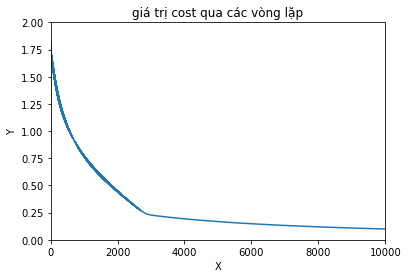

In [262]:
"""
@author Trong Nghia

"""
plt.plot(arr_epoch,costs, label='Python')
plt.title('giá trị cost qua các vòng lặp')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(0,2)
plt.xlim(0,EPOCH)
plt.show()

In [269]:
"""
@author Trong Nghia

"""
#load dữ liệu test shape(m,image_widght,image_height,chanel)
X_TEST = standardized_image_test(PATH_FODER_IMAGE_TEST,IMAGE_WIDGHT, IMAGE_HEIGHT, CHANEL)

In [270]:
"""
@author Trong Nghia

"""
#chuẩn hóa dữ liệu cho model predict shape(image_widght*image_height*chanel,m)
X_TEST_STANDARD = X_TEST.reshape(X_TEST.shape[0], -1).T #shape (a,b,c,d) => shape (b*c*d,a)

In [271]:
"""
@author Trong Nghia

"""
Y_PREDICT, num_label_1, num_label_0 = predict(w_model,b,X_TEST_STANDARD)

In [272]:
"""
@author Trong Nghia

"""
print("nhãn của dữ đoán của tập test:\n" + str(Y_PREDICT) +"\n\n")
print("số ảnh dự đoán là nhãn 1(cat):" + str(num_label_1))
print("số ảnh dự đoán là nhãn 0(dog):" + str(num_label_0))

nhãn của dữ đoán của tập test:
[[0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.
  0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0.
  1. 0.]]


số ảnh dự đoán là nhãn 1(cat):23
số ảnh dự đoán là nhãn 0(dog):27


nhãn dự đoán: 0.0


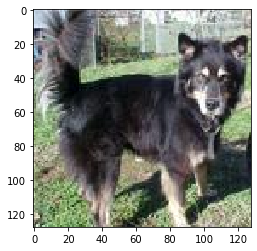

In [273]:
"""
@author Trong Nghia

"""
#hiển thị ảnh test
plt.imshow(X_TEST[3])
#hiển thị nhãn của ảnh test
print("nhãn dự đoán: "+ str(Y_PREDICT[0][3]))